In [1]:
## XGBoost 
# State 1 hot 
# Rurality Data
# SVI poverty index
# Minority?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import xgboost as xgb 
import shap
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import pairwise
from sklearn.model_selection import cross_val_score
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import re

In [2]:
main_path = Path.cwd()
data_path = main_path / 'Data'

#svi = pd.read_csv( data_path / 'Master Project Data' /'SVI Tract Data.csv',  )


In [3]:
# import stored methods 
path = Path.cwd()
main_path = Path.cwd()
data_path = main_path / 'Data'
from src.data import DataLoaders

ACS =  DataLoaders.ACSData(2016,'block_group')
ARC =  DataLoaders.ARCPData()

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [4]:
ACS = ACS.data
ACS

,inc_pct_poverty,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_black,race_pct_amind,race_pct_asian,race_pct_napi,race_pct_other,...,house_yr_pct_before_1960,house_yr_pct_after_2000,house_yr_pct_1960_2000,house_val_less_50K,house_val_50_100K,house_val_100K_300K,house_val_300K_500K,house_val_more_500K,race_pct_black_or_amind,pct_alt_heat
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,0.191946,0.785235,0.763758,0.214765,0.236242,0.214765,0.000000,0.000000,0.000000,0.000000,...,0.221831,0.193662,0.584507,0.152047,0.274854,0.508772,0.064327,0.000000,0.214765,0.017606
010010201002,0.044269,0.856126,0.826877,0.143874,0.173123,0.082213,0.000000,0.007115,0.000000,0.000000,...,0.079229,0.085653,0.835118,0.100264,0.153034,0.538259,0.174142,0.034301,0.082213,0.032895
010010202001,0.382199,0.376042,0.376042,0.623958,0.623958,0.591667,0.000000,0.000000,0.013542,0.000000,...,0.135678,0.211055,0.653266,0.171053,0.337719,0.394737,0.065789,0.030702,0.591667,0.000000
010010202002,0.111426,0.497573,0.488673,0.502427,0.511327,0.461974,0.000000,0.019417,0.000000,0.008091,...,0.235772,0.075203,0.689024,0.053691,0.513423,0.412752,0.020134,0.000000,0.461974,0.019912
010010203001,0.042301,0.626481,0.626481,0.373519,0.373519,0.217851,0.009306,0.011421,0.002538,0.096447,...,0.030303,0.091887,0.877810,0.057522,0.349558,0.592920,0.000000,0.000000,0.227157,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,0.094029,0.950583,0.929307,0.049417,0.070693,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.308305,0.121729,0.569966,0.089320,0.114563,0.666019,0.091262,0.038835,0.000000,0.366569
560459511002,0.062579,0.935884,0.918642,0.064116,0.081358,0.009698,0.004849,0.044720,0.000000,0.000000,...,0.197500,0.337500,0.465000,0.123437,0.079687,0.525000,0.232812,0.039062,0.014547,0.825737
560459513001,0.261512,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.556757,0.000000,0.443243,0.229282,0.303867,0.466851,0.000000,0.000000,0.000000,0.105163


In [5]:
ACS = ACS[ACS.index.str[:2]=='24']
ACS

,inc_pct_poverty,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_black,race_pct_amind,race_pct_asian,race_pct_napi,race_pct_other,...,house_yr_pct_before_1960,house_yr_pct_after_2000,house_yr_pct_1960_2000,house_val_less_50K,house_val_50_100K,house_val_100K_300K,house_val_300K_500K,house_val_more_500K,race_pct_black_or_amind,pct_alt_heat
GEOID,,,,,,,,,,,,,,,,,,,,,
240010001001,0.085308,0.988942,0.988942,0.011058,0.011058,0.011058,0.0,0.000000,0.000000,0.0,...,0.143363,0.185841,0.670796,0.043860,0.254386,0.675439,0.026316,0.000000,0.011058,0.832776
240010001002,0.112632,0.958537,0.950000,0.041463,0.050000,0.012195,0.0,0.019512,0.000000,0.0,...,0.464680,0.134658,0.400662,0.069643,0.191071,0.562500,0.117857,0.058929,0.012195,0.829446
240010001003,0.087320,0.952164,0.919514,0.047836,0.080486,0.046317,0.0,0.001519,0.000000,0.0,...,0.424658,0.065449,0.509893,0.016627,0.494062,0.415677,0.054632,0.019002,0.046317,0.783626
240010002001,0.066752,0.976893,0.964056,0.023107,0.035944,0.002567,0.0,0.011553,0.000000,0.0,...,0.372591,0.115632,0.511777,0.091205,0.140065,0.491857,0.250814,0.026059,0.002567,0.631737
240010002002,0.103720,0.962796,0.948140,0.037204,0.051860,0.000000,0.0,0.027057,0.010147,0.0,...,0.570485,0.041850,0.387665,0.030864,0.246914,0.651235,0.070988,0.000000,0.000000,0.607656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245102804034,0.060046,0.323077,0.323077,0.676923,0.676923,0.639560,0.0,0.000000,0.000000,0.0,...,0.766667,0.000000,0.233333,0.000000,0.191489,0.670213,0.138298,0.000000,0.639560,0.400000
245102804035,0.103390,0.328814,0.300000,0.671186,0.700000,0.640678,0.0,0.000000,0.000000,0.0,...,0.775330,0.127753,0.096916,0.000000,0.000000,0.035461,0.758865,0.205674,0.640678,0.044053
245102804041,0.254382,0.031712,0.031712,0.968288,0.968288,0.966985,0.0,0.000000,0.000000,0.0,...,0.420938,0.100327,0.478735,0.011765,0.211765,0.656471,0.028235,0.091765,0.966985,0.009302


In [6]:
ARC = ARC.data
ARC

,geoid,census_block_group_y,census_block_group_x,city,state,zip,county,in_home_visit_date,smoke_alarms_installed__9_volt_10_year_dhh_,10_year_and_9_volt_alarms_installed,...,batteries_replaced,fire_escape_plans_made,fire_safety_checklists_completed,additional_hazard_education_conducted,additional_hazard_type,people_served,youth_served,seniors_served,veterans_military_members_and_military_family_members_served,individuals_with_disabilities_access_or_functional_needs_served
12,010010205002,32.470418,-86.424166,PRATTVILLE,AL,36066,Autauga,9/9/2016,1,1,...,0,1,1,0,None,2,0,0,0,0
18,010010208012,32.455173,-86.534590,PRATTVILLE,AL,36067,Autauga,9/30/2019,2,2,...,0,1,1,1,Tornadoes,5,0,0,1,0
23,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,5/4/2019,3,2,...,0,1,1,1,Other,1,0,0,0,0
24,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,9/27/2019,1,1,...,0,1,1,1,Tornadoes,1,0,0,0,0
27,010010208023,32.543983,-86.492100,PRATTVILLE,AL,36067,Autauga,12/2/2017,3,3,...,0,1,1,0,None,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862041,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,2,2,...,0,1,1,1,Wildfires,1,0,0,0,0
862042,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,4,2,0,0,0
862043,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,2,0,1,0,1
862044,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,4,4,...,0,1,1,1,Wildfires,3,0,0,0,0


In [7]:
ARC = ARC[ARC['geoid'].astype(str).str[:2]=='24']
ARC

,geoid,census_block_group_y,census_block_group_x,city,state,zip,county,in_home_visit_date,smoke_alarms_installed__9_volt_10_year_dhh_,10_year_and_9_volt_alarms_installed,...,batteries_replaced,fire_escape_plans_made,fire_safety_checklists_completed,additional_hazard_education_conducted,additional_hazard_type,people_served,youth_served,seniors_served,veterans_military_members_and_military_family_members_served,individuals_with_disabilities_access_or_functional_needs_served
348858,240010003001,39.707669,-78.744141,CUMBERLAND,MD,21502,Allegany,10/15/2016,1,1,...,0,1,1,1,Other,2,0,0,0,0
348859,240010003001,39.707669,-78.744141,CUMBERLAND,MD,21502,Allegany,10/15/2016,3,3,...,0,1,1,1,Other,2,0,1,1,0
348860,240010003001,39.707669,-78.744141,CUMBERLAND,MD,21502,Allegany,10/15/2016,3,3,...,0,1,1,1,Flooding,3,1,0,0,1
348861,240010003001,39.707669,-78.744141,CUMBERLAND,MD,21502,Allegany,10/15/2016,4,4,...,0,1,1,1,Other,4,2,0,1,0
348862,240010003001,39.707669,-78.744141,CUMBERLAND,MD,21502,Allegany,10/15/2016,6,6,...,0,1,1,1,Other,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368505,245102804041,39.284994,-76.690174,BALTIMORE,MD,21229,Baltimore City,1/8/2019,2,2,...,0,0,0,0,None,1,0,0,0,0
368506,245102804041,39.284994,-76.690174,BALTIMORE,MD,21229,Baltimore City,1/15/2019,3,3,...,0,0,0,0,None,1,0,0,0,0
368508,245102804041,39.284994,-76.690174,BALTIMORE,MD,21229,Baltimore City,1/7/2019,2,2,...,0,0,0,0,None,1,0,0,0,0
368514,245102804041,39.284994,-76.690174,BALTIMORE,MD,21229,Baltimore City,3/12/2019,0,0,...,0,1,1,1,Flooding,1,0,0,1,0


In [7]:
# import stored methods 
#path = Path.cwd().parent.parent

#LoadAndCleanARCP = main_path /'src' /'data'/ 'LoadAndCleanARCP.py'
#LoadAndCleanACS = main_path /'src' /'data'/ 'LoadAndCleanACS.py'
# Run methods to obtain clean datasets 

#%run $LoadAndCleanARCP
#%run $LoadAndCleanACS

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


                     Pair Var 1                    Pair Var 2  Corr Value
154            denom_house_room                   denom_kitch         1.0
153            denom_house_room                   denom_plumb         1.0
206                 denom_plumb                   denom_kitch         1.0
151            denom_house_room                denom_house_yr         1.0
176              denom_house_yr                   denom_kitch         1.0
..                          ...                           ...         ...
139     house_pct_ownd_occupied       house_pct_rent_occupied        -1.0
226  house_pct_complete_kitchen  house_pct_incomplete_kitchen        -1.0
113            house_pct_family          house_pct_non_family        -1.0
107           worked_past_12_mo       did_not_work_past_12_mo        -1.0
11             race_pct_whitenh           race_pct_nonwhitenh        -1.0

[95 rows x 3 columns]
              inc_pct_poverty  race_pct_white  race_pct_whitenh  \
GEOID                 

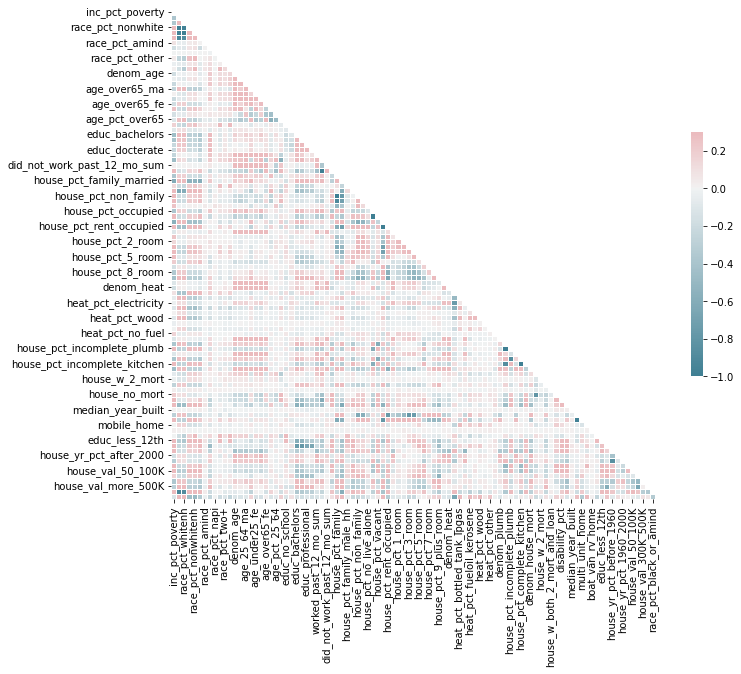

In [8]:
#Find correlated features in ACS dataset and identify the highly correlated relationships

# Create ACS correlation matrix
corr = ACS.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
# Filtering out lower/upper triangular duplicates 
corr_high = corr[abs(corr) > 0.7].stack().reset_index()
corr_high = corr_high[corr_high['level_0'].astype(str)!=corr_high['level_1'].astype(str)]
corr_high['ordered-cols'] = corr_high.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
corr_high = corr_high.drop_duplicates(['ordered-cols'])
corr_high.drop(['ordered-cols'], axis=1, inplace=True)
corr_high.columns = ['Pair Var 1', 'Pair Var 2', 'Corr Value']

# Display highly correlated pairs
print(corr_high.sort_values(by=['Corr Value'], ascending=False))




#From highly correlated pairs, remove one of the Pair Vars from the ACS dataset except for the 'mort' variables
#ACS = ACS.drop(['house_pct_vacant', 'did_not_work_past_12_mo', 'house_pct_non_family', 'house_pct_rent_occupied',
#                           'race_pct_white', 'race_pct_nonwhitenh','race_pct_hisp', 'house_pct_incomplete_plumb',
#                           'house_pct_incomplete_kitchen', 'race_pct_whitenh','house_no_mort',
#                           'race_pct_black','house_pct_live_alone','house_pct_family_married','educ_bachelors',
#                           'heat_pct_electricity','house_pct_complete_kitchen','house_yr_pct_1960_2000'], axis=1) 





print (ACS.head())


In [9]:
# Based on feature importance experiments, select features with consistence importance across annual predictions
ACS_reduced = ACS[['heat_pct_coal','heat_pct_solar','house_yr_pct_before_1960','educ_less_12th','heat_pct_wood',
                  'inc_pct_poverty','age_pct_over65','race_pct_nonwhite','house_val_100K_300K','educ_no_school',
                  'house_pct_ownd_occupied','heat_pct_utility_gas','house_w_home_equity_loan','house_val_less_50K',
                  'educ_high_school','house_pct_family','heat_pct_other','house_pct_family_female_hh']]



In [10]:
ACS_cols_to_use =[ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind']
ACS_commonCols = ACS[ACS_cols_to_use]
ACS_justSmoke_Cols = [ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind',
                'age_pct_over65',
                'house_val_less_50K']
ACS_justSmokeCols = ACS[ACS_justSmoke_Cols]

In [11]:
# smoke detector statistical model munging
#sm = pd.read_csv(  data_path /'Model Outputs'/'SmokeAlarmModelOutput.csv')
sm = pd.read_csv(  data_path /'Model Outputs'/'SmokeAlarmModelMultiLevel.csv')
print(np.unique(sm.geography))
sm


['block_group' 'county' 'state' 'tract']


,geoid,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography
0,#_010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group
1,#_010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group
2,#_010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group
3,#_010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group
4,#_010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group
...,...,...,...,...,...,...,...,...,...
213734,#_560459511001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213735,#_560459511002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213736,#_560459513001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213737,#_560459513002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state


In [12]:
sm['geoid'] = sm['geoid'].str[2:]
sm['tract'] = sm['geoid'].str[:-1]
sm.set_index('geoid', inplace =  True)
sm_all = sm.copy()
#sm_all = sm[ sm['geography'].isin(['county','state']) ]

sm = sm[ sm['geography'].isin(['tract','block_group']) ]

sm_all

,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography,tract
geoid,,,,,,,,,
010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group,01013953400
010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group,01013953400
010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group,01073002303
010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group,01073003500
010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group,01073003500
...,...,...,...,...,...,...,...,...,...
560459511001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100
560459511002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100
560459513001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951300


In [14]:
sm_all = sm_all[sm_all.index.str[:2]=='24']
sm_all

,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography,tract
geoid,,,,,,,,,
240054026042,30,7.0,23.33,15.134412,6.0,20.00,14.313816,block_group,24005402604
240135010021,50,49.0,98.00,3.880602,29.0,58.00,13.680744,block_group,24013501002
240150312023,33,26.0,78.79,13.947777,20.0,60.61,16.671099,block_group,24015031202
240217754005,45,39.0,86.67,9.931144,35.0,77.78,12.146630,block_group,24021775400
240253013011,34,25.0,73.53,14.829478,19.0,55.88,16.690239,block_group,24025301301
...,...,...,...,...,...,...,...,...,...
240419608002,5101,3899.0,76.44,1.164599,2578.0,50.54,1.372060,state,24041960800
240419609001,5101,3899.0,76.44,1.164599,2578.0,50.54,1.372060,state,24041960900
240419609002,5101,3899.0,76.44,1.164599,2578.0,50.54,1.372060,state,24041960900


In [15]:
sm = sm[sm.index.str[:2]=='24']

In [46]:
sm

,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography,tract
geoid,,,,,,,,,
240054026042,30,7.0,23.33,15.134412,6.0,20.00,14.313816,block_group,24005402604
240135010021,50,49.0,98.00,3.880602,29.0,58.00,13.680744,block_group,24013501002
240150312023,33,26.0,78.79,13.947777,20.0,60.61,16.671099,block_group,24015031202
240217754005,45,39.0,86.67,9.931144,35.0,77.78,12.146630,block_group,24021775400
240253013011,34,25.0,73.53,14.829478,19.0,55.88,16.690239,block_group,24025301301
...,...,...,...,...,...,...,...,...,...
245102802002,42,39.0,92.86,7.787443,26.0,61.90,14.687208,tract,24510280200
245102802003,42,39.0,92.86,7.787443,26.0,61.90,14.687208,tract,24510280200
245102802004,42,39.0,92.86,7.787443,26.0,61.90,14.687208,tract,24510280200


In [16]:
def create_rurality_data(sm,subset_county = False): 
    #Rurality Data Munging 
    rd = pd.read_csv( data_path / 'Master Project Data' /'Tract Rurality Data.csv', dtype = {'Tract':'object'},encoding = 'latin-1' )
    rd['Population Density (per square mile), 2010'] =  rd['Population Density (per square mile), 2010'].str.replace(',','').astype('float')
    rd = rd.iloc[:,[0,2,4,6,8]]
    block_tract = sm['tract'].to_frame()
    block_tract = block_tract.reset_index()
    rd = block_tract.merge(rd, how = 'left', left_on = 'tract' , right_on ='Tract')
    rd.set_index('geoid',inplace= True)
    rd = rd.iloc[:,2:]
    rd['Select State'] = rd['Select State'].astype('category')

    # add state level model estimates 
    sms = pd.rd = pd.read_csv( data_path /'Model Outputs'/'Smoke_Alarm_Single_Level'/ 'SmokeAlarmModelState.csv')
    sms['geoid'] = sms['geoid'].str[2:]
    sms =  sms.loc[:,['geoid','detectors_found_prc']]
    sms = sms.rename(columns= {'geoid':'state_geoid'}  )

    rd['state_geoid'] = rd.index.str[:2]
    rd = rd.reset_index()
    rd = rd.merge(sms,how = 'left', on = 'state_geoid' )
    rd.drop('state_geoid',axis = 1,inplace = True)
    rd = rd.rename(columns = {'detectors_found_prc':'state_detectors_found_prc'}) 
    rd = rd.set_index('geoid')


    # add county level estimates
    smc = pd.read_csv( data_path /'Model Outputs'/'Smoke_Alarm_Single_Level'/ 'SmokeAlarmModelCounty.csv')
    smc['geoid'] = smc['geoid'].str[2:]
    if subset_county:
        smc.iloc[0::2,:] = np.nan
    smc =  smc.loc[:,['geoid','detectors_found_prc']]
    smc = smc.rename(columns= {'geoid':'county_geoid'}  )

    rd['county_geoid'] = rd.index.str[:5]
    rd = rd.reset_index()
    rd = rd.merge(smc,how = 'left', on = 'county_geoid' )
    rd.drop('county_geoid',axis = 1,inplace = True)
    rd = rd.rename(columns = {'detectors_found_prc':'county_detectors_found_prc'}) 
    rd = rd.set_index('geoid')
  #  rd['RUCA_rurality_index'] = rd['Primary RUCA Code 2010']
  #  rd[rd['RUCA_rurality_index'] > 10 ] = np.NaN
    rd = rd.iloc[:,3:]

    return rd 

# alternative 1 hot based encoding
#rd = rd.merge( pd.get_dummies(rd['Select State']), how = 'left', on= 'geoid')


In [17]:
rd = create_rurality_data(sm,True)
rd_all = create_rurality_data(sm_all)

In [18]:
rd

,"Population Density (per square mile), 2010",state_detectors_found_prc,county_detectors_found_prc
geoid,,,
240054026042,NaN,76.44,77.67
240135010021,NaN,76.44,NaN
240150312023,NaN,76.44,82.50
240217754005,NaN,76.44,NaN
240253013011,NaN,76.44,NaN
...,...,...,...
245102802002,NaN,76.44,NaN
245102802003,NaN,76.44,NaN
245102802004,NaN,76.44,NaN


In [19]:
def train_model(X = rd, ACS = pd.DataFrame(), y= sm, predict ='Presence', modeltype='XGBoost'):
    from scipy.stats import zscore, pearsonr
    from sklearn.metrics import auc, accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error,roc_auc_score, r2_score

    assert(predict in ['Presence', 'Working']) 
   
    
    # Define model types & parameters 
    
    if modeltype =='LinearRegression':
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
    if modeltype =='ElasticNet':    
        from sklearn.linear_model import ElasticNet
        model = ElasticNet()
    if modeltype =='Ridge':    
        from sklearn.linear_model import Ridge
        model = Ridge()
    if modeltype =='Lasso':    
        from sklearn.linear_model import Lasso
        model = Lasso()       
        
       
        
    elif modeltype =='XGBoost':
        model = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = 0)
            
  
    if  predict == 'Presence':
        y = y['detectors_found_prc']
    elif predict =='Working':
        y = y['detectors_working_prc']


    # merge in ACS Data into X unless NFIRS-Only model
    if not ACS.empty:
        X = X.merge(ACS, how ='left',left_index = True, right_index = True)
        print(X.size)
        print(y.size)
        #X = X[X.index.isin(y.index)]
        #y = y[y.index.isin(X.index)]
        print(X.size)
        print(y.size)
        y = y.filter(X.index)
    
    # Create 80/20 training/testing set split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2 )

    # Perform cross-validation 

    #scaler = preprocessing.StandardScaler().fit(X)
    #scaler.transform(X)
    #print ('Cross Val Score:')
    #print(cross_val_score(model, X, y))

    # Standardize features by removing the mean and scaling to unit variance
    
    #scaler = preprocessing.StandardScaler().fit(X_train)
    #X_columns = X_train.columns
    #X_train =  pd.DataFrame(scaler.transform(X_train), columns = X_columns )
    #X_test  =  pd.DataFrame(scaler.transform(X_test) , columns = X_columns )

    # Fit model to training set

    model = model.fit(X_train,y_train)

    # Calculate training set performance
    train_predictions = model.predict(X_train)
    print('-----Training_Performance------')
    print(mean_squared_error(y_train, train_predictions))
    print ('Test RMSE: {}'.format(mean_squared_error(y_train, train_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_train, train_predictions)) )
    sns.scatterplot(y_train,train_predictions) 
    plt.show()
    
    # Calculate test set performance
    test_predictions = model.predict(X_test)
    print ('-----Test Performance ----- ')
    print ('Test RMSE: {}'.format(mean_squared_error(y_test, test_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_test, test_predictions)) )
    sns.scatterplot(y_test,test_predictions) 
    plt.show()
    print ('Test Correlation: {}'.format(pearsonr(y_test, test_predictions)) )
    print ('Test R-squared: {}'.format(r2_score(y_test, test_predictions)) )


    #Calculate feature importance for each model
    if modeltype == 'XGBoost':
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        print("\n Feature ranking:")
        for f in range(len(X_test.columns)):
            print("%d. %s (%f)" % (f + 1, X_test.columns[indices[f]], importances[indices[f]])) 


    return  model,X_test,y_test



In [20]:
def train_model_justACS(ACS = pd.DataFrame(), y= sm, predict ='Presence', modeltype='XGBoost'):
    from scipy.stats import zscore, pearsonr
    from sklearn.metrics import auc, accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error,roc_auc_score, r2_score

    assert(predict in ['Presence', 'Working']) 
   
    
    # Define model types & parameters 
    
    if modeltype =='LinearRegression':
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
    if modeltype =='ElasticNet':    
        from sklearn.linear_model import ElasticNet
        model = ElasticNet()
    if modeltype =='Ridge':    
        from sklearn.linear_model import Ridge
        model = Ridge()
    if modeltype =='Lasso':    
        from sklearn.linear_model import Lasso
        model = Lasso()       
        
       
        
    elif modeltype =='XGBoost':
        model = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = 0)
            
  
    if  predict == 'Presence':
        y = y['detectors_found_prc']
    elif predict =='Working':
        y = y['detectors_working_prc']


    # merge in ACS Data into X unless NFIRS-Only model
    if not ACS.empty:
        X = ACS
        print(X.size)
        print(y.size)
        X = X[X.index.isin(y.index)]
        y = y[y.index.isin(X.index)]
        print(X.size)
        print(y.size)
        y = y.filter(X.index)
    
    # Create 80/20 training/testing set split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2 )

    # Perform cross-validation 

    #scaler = preprocessing.StandardScaler().fit(X)
    #scaler.transform(X)
    #print ('Cross Val Score:')
    #print(cross_val_score(model, X, y))

    # Standardize features by removing the mean and scaling to unit variance
    
    #scaler = preprocessing.StandardScaler().fit(X_train)
    #X_columns = X_train.columns
    #X_train =  pd.DataFrame(scaler.transform(X_train), columns = X_columns )
    #X_test  =  pd.DataFrame(scaler.transform(X_test) , columns = X_columns )

    # Fit model to training set

    model = model.fit(X_train,y_train)

    # Calculate training set performance
    train_predictions = model.predict(X_train)
    print('-----Training_Performance------')
    print(mean_squared_error(y_train, train_predictions))
    print ('Test RMSE: {}'.format(mean_squared_error(y_train, train_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_train, train_predictions)) )
    sns.scatterplot(y_train,train_predictions) 
    plt.show()
    
    # Calculate test set performance
    test_predictions = model.predict(X_test)
    print ('-----Test Performance ----- ')
    print ('Test RMSE: {}'.format(mean_squared_error(y_test, test_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_test, test_predictions)) )
    sns.scatterplot(y_test,test_predictions) 
    plt.show()
    print ('Test Correlation: {}'.format(pearsonr(y_test, test_predictions)) )
    print ('Test R-squared: {}'.format(r2_score(y_test, test_predictions)) )


    #Calculate feature importance for each model
    if modeltype == 'XGBoost':
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        print("\n Feature ranking:")
        for f in range(len(X_test.columns)):
            print("%d. %s (%f)" % (f + 1, X_test.columns[indices[f]], importances[indices[f]])) 


    return  model,X_test,y_test



11484
116
11484
116
-----Training_Performance------
1.9745350442371774e-07
Test RMSE: 0.00044435740617628704
Test MAE: 0.00031504242316530924


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


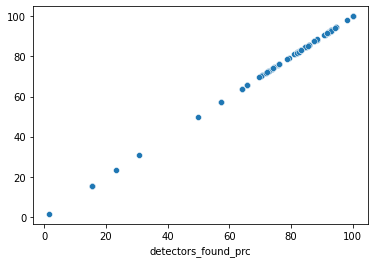

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


-----Test Performance ----- 
Test RMSE: 25.02450150862912
Test MAE: 19.311451737085978


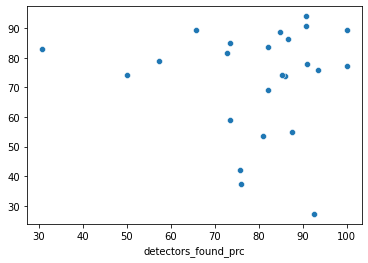

Test Correlation: (-0.043862473488147036, 0.8387382251453384)
Test R-squared: -1.5552358017247938

 Feature ranking:
1. median_year_built (0.466414)
2. did_not_work_past_12_mo_sum (0.136372)
3. educ_bachelors (0.119500)
4. age_25_64_fe (0.043752)
5. mobile_home (0.023699)
6. house_no_mort (0.019685)
7. house_yr_pct_1960_2000 (0.012582)
8. heat_pct_fueloil_kerosene (0.012456)
9. house_pct_6_room (0.010524)
10. race_pct_hisp (0.010161)
11. house_w_2_mort (0.010051)
12. multi_unit_home (0.009834)
13. house_pct_4_room (0.008952)
14. inc_pct_poverty (0.008794)
15. race_pct_amind (0.008195)
16. race_pct_whitenh (0.007918)
17. educ_less_12th (0.007619)
18. snap_past_12_mo (0.006879)
19. race_pct_other (0.006470)
20. age_over65_ma (0.005800)
21. race_pct_white (0.005355)
22. house_pct_3_room (0.005286)
23. educ_associates (0.004055)
24. house_pct_7_room (0.003910)
25. race_pct_black (0.003398)
26. house_pct_occupied (0.003297)
27. age_pct_under25 (0.003097)
28. denom_age (0.002901)
29. house_p

In [21]:
mdl,X_test,y_test = train_model(X = rd, ACS = ACS, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


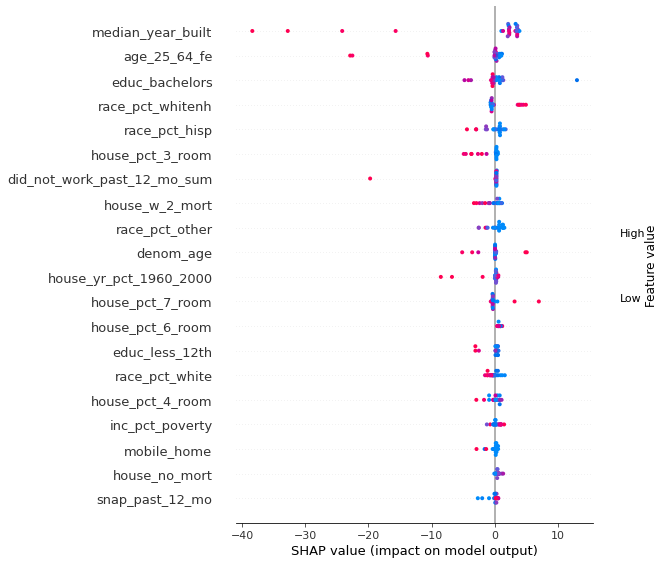

In [22]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

366432
116
11136
116
-----Training_Performance------
1.408305070192365e-07
Test RMSE: 0.0003752739093238917
Test MAE: 0.0002800476551059219


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


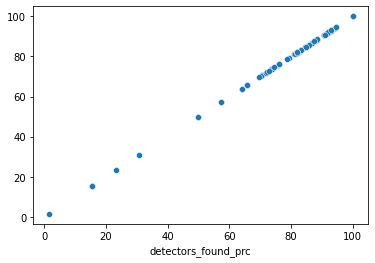

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


-----Test Performance ----- 
Test RMSE: 27.32334088483342
Test MAE: 18.912248573303224


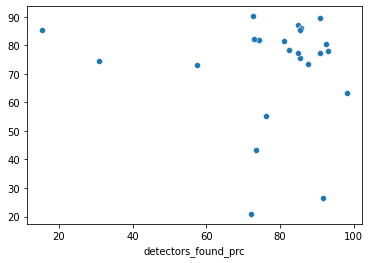

Test Correlation: (-0.0704864985212614, 0.7434521360739188)
Test R-squared: -1.1293286035377927

 Feature ranking:
1. house_yr_pct_after_2000 (0.544118)
2. mobile_home (0.063892)
3. race_pct_amind (0.058841)
4. race_pct_napi (0.049840)
5. denom_house_mort (0.034758)
6. race_pct_other (0.029065)
7. age_over65_ma (0.018908)
8. house_pct_6_room (0.018771)
9. inc_pct_poverty (0.016656)
10. house_pct_family (0.013522)
11. house_pct_family_female_hh (0.013113)
12. heat_pct_utility_gas (0.012188)
13. educ_less_12th (0.010618)
14. spanish_speaking (0.010548)
15. median_year_built (0.009917)
16. single_unit_home (0.009377)
17. house_w_2_mort (0.009035)
18. house_pct_7_room (0.008717)
19. age_under25_fe (0.005888)
20. house_w_home_equity_loan (0.005527)
21. worked_past_12_mo (0.005354)
22. heat_pct_electricity (0.004682)
23. house_pct_no_live_alone (0.004376)
24. house_pct_4_room (0.004049)
25. house_pct_occupied (0.004004)
26. educ_high_school (0.003773)
27. house_pct_3_room (0.002815)
28. deno

In [23]:
mdl_justACS,X_test,y_test = train_model_justACS(ACS = ACS, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


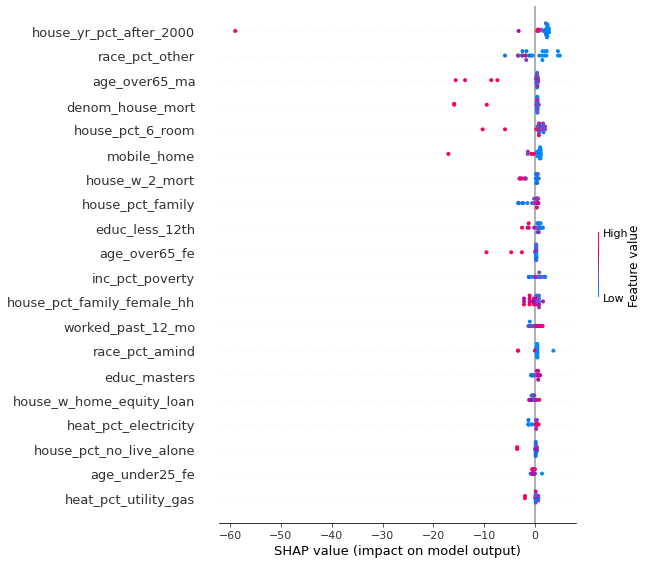

In [24]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl_justACS).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

2436
116
2436
116
-----Training_Performance------
2.668582603777407e-07
Test RMSE: 0.0005165832559982376
Test MAE: 0.00036914815073448075


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


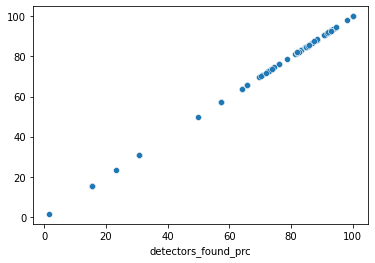

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


-----Test Performance ----- 
Test RMSE: 22.55509526986595
Test MAE: 14.746286854743957


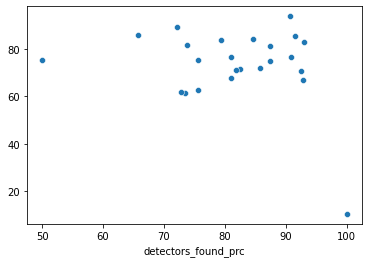

Test Correlation: (-0.24738870816953482, 0.24382449461188146)
Test R-squared: -3.5293850236135347

 Feature ranking:
1. heat_pct_other (0.247467)
2. educ_no_school (0.189509)
3. house_pct_family_female_hh (0.101832)
4. inc_pct_poverty (0.093453)
5. house_val_100K_300K (0.046780)
6. house_yr_pct_before_1960 (0.044417)
7. educ_less_12th (0.044308)
8. county_detectors_found_prc (0.041077)
9. house_w_home_equity_loan (0.039696)
10. age_pct_over65 (0.035869)
11. house_pct_ownd_occupied (0.031726)
12. heat_pct_utility_gas (0.029241)
13. house_pct_family (0.016799)
14. educ_high_school (0.013837)
15. race_pct_nonwhite (0.011563)
16. heat_pct_wood (0.006136)
17. house_val_less_50K (0.003525)
18. heat_pct_solar (0.002767)
19. heat_pct_coal (0.000000)
20. state_detectors_found_prc (0.000000)
21. Population Density (per square mile), 2010 (0.000000)


In [25]:
mdl2,X_test,y_test =train_model(X = rd, y = sm , ACS = ACS_reduced  ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


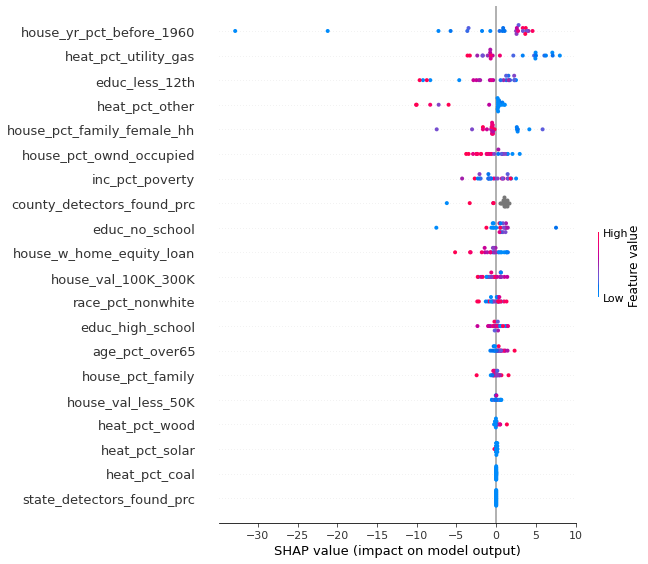

In [26]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl2).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

68706
116
2088
116
-----Training_Performance------
4.007679454105773e-07
Test RMSE: 0.0006330623550730033
Test MAE: 0.0004241813784060353


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


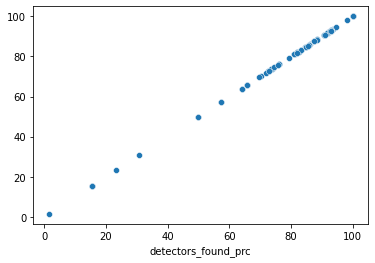

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


-----Test Performance ----- 
Test RMSE: 18.33349155439134
Test MAE: 13.002083930969237


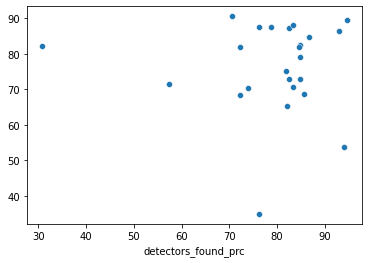

Test Correlation: (-0.018199898630438638, 0.9327321492219157)
Test R-squared: -1.0284535259103178

 Feature ranking:
1. age_pct_over65 (0.156663)
2. inc_pct_poverty (0.156451)
3. educ_no_school (0.125288)
4. heat_pct_other (0.097182)
5. educ_high_school (0.082430)
6. house_pct_ownd_occupied (0.057903)
7. educ_less_12th (0.052107)
8. house_val_less_50K (0.042002)
9. house_pct_family_female_hh (0.041965)
10. house_yr_pct_before_1960 (0.037504)
11. house_pct_family (0.036986)
12. heat_pct_utility_gas (0.035355)
13. race_pct_nonwhite (0.034962)
14. house_w_home_equity_loan (0.017528)
15. house_val_100K_300K (0.014673)
16. heat_pct_wood (0.008136)
17. heat_pct_solar (0.001648)
18. heat_pct_coal (0.001218)


In [27]:
mdl2_justACS,X_test,y_test =train_model_justACS(ACS = ACS_reduced, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


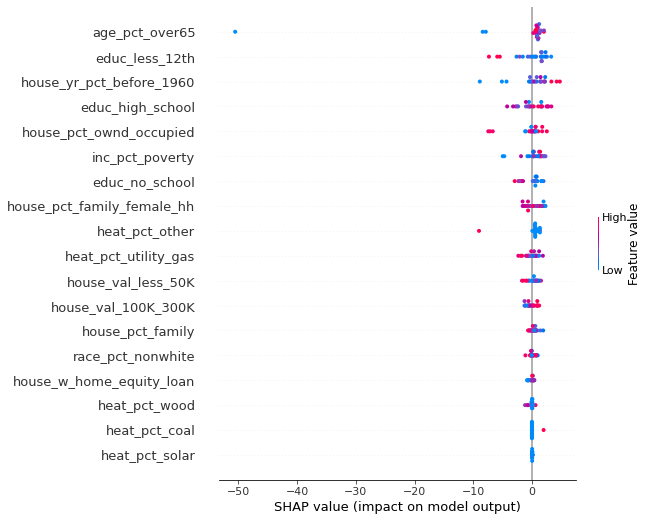

In [28]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl2_justACS).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

-----Training_Performance------
390.7168218888431
Test RMSE: 19.766558170021487
Test MAE: 13.25277258168096


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


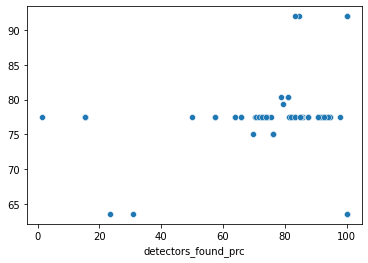

-----Test Performance ----- 
Test RMSE: 14.884867042254353
Test MAE: 11.994128150939941


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


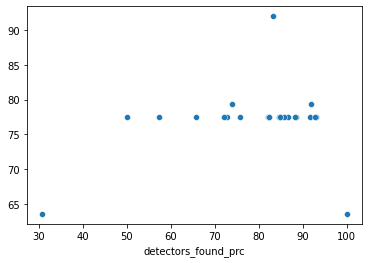

Test Correlation: (0.2519440789901608, 0.234968687797323)
Test R-squared: 0.03597085144418699

 Feature ranking:
1. county_detectors_found_prc (1.000000)
2. state_detectors_found_prc (0.000000)
3. Population Density (per square mile), 2010 (0.000000)


In [29]:
mdl3,X_test,y_test=train_model(X = rd, y = sm ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
All-NaN slice encountered


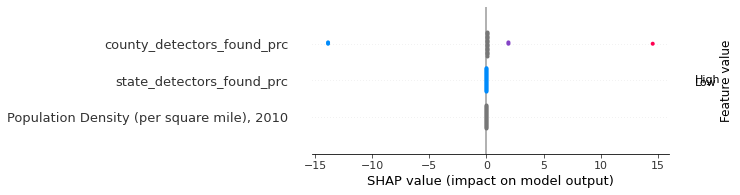

In [30]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl3).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

1044
116
1044
116
-----Training_Performance------
6.199688272642671e-07
Test RMSE: 0.0007873809924453771
Test MAE: 0.0005381081415261564


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


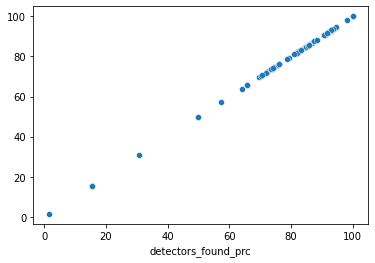

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


-----Test Performance ----- 
Test RMSE: 24.933887955162554
Test MAE: 17.007102295557658


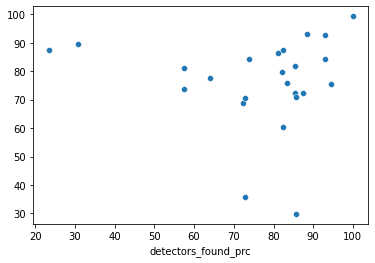

Test Correlation: (-0.06107068601027353, 0.7768112191913141)
Test R-squared: -0.8577067545854127

 Feature ranking:
1. pct_alt_heat (0.247215)
2. house_pct_live_alone (0.173090)
3. inc_pct_poverty (0.156427)
4. house_yr_pct_before_1960 (0.149925)
5. race_pct_black_or_amind (0.134945)
6. did_not_work_past_12_mo (0.099731)
7. county_detectors_found_prc (0.038668)
8. state_detectors_found_prc (0.000000)
9. Population Density (per square mile), 2010 (0.000000)


In [31]:
mdl4,X_test,y_test =train_model(X = rd, y = sm , ACS = ACS_commonCols  ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
All-NaN slice encountered


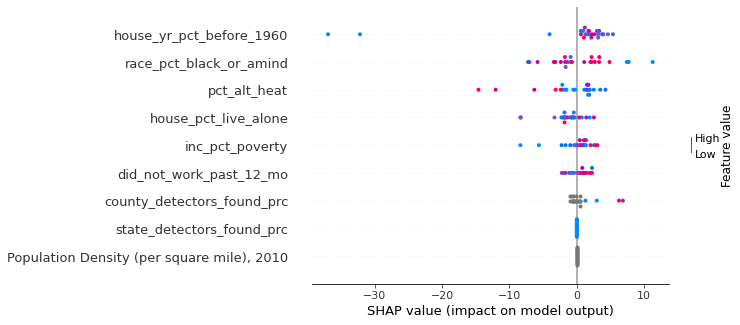

In [32]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl4).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

22902
116
696
116
-----Training_Performance------
6.778190838864421e-07
Test RMSE: 0.0008232976884981775
Test MAE: 0.0005520932570752619


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


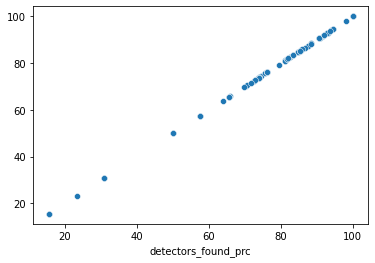

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


-----Test Performance ----- 
Test RMSE: 29.863997826832556
Test MAE: 18.460457242329912


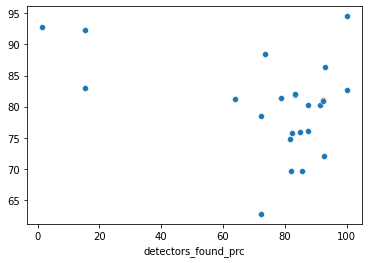

Test Correlation: (-0.36288527183207053, 0.08136198522376967)
Test R-squared: -0.3186802058791094

 Feature ranking:
1. inc_pct_poverty (0.212498)
2. pct_alt_heat (0.200978)
3. race_pct_black_or_amind (0.199928)
4. did_not_work_past_12_mo (0.174220)
5. house_pct_live_alone (0.141873)
6. house_yr_pct_before_1960 (0.070504)


In [33]:
mdl4_justACS,X_test,y_test = train_model_justACS(ACS = ACS_commonCols, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


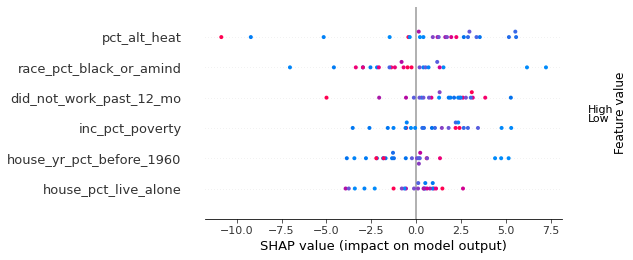

In [34]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl4_justACS).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

1276
116
1276
116
-----Training_Performance------
7.245471554253319e-07
Test RMSE: 0.0008512033572685977
Test MAE: 0.0005886211602582698


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


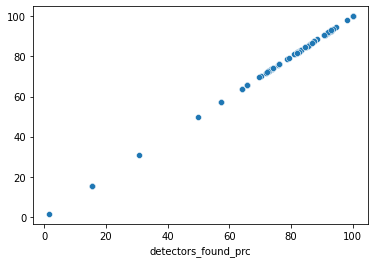

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


-----Test Performance ----- 
Test RMSE: 28.789079840984922
Test MAE: 17.281745953559874


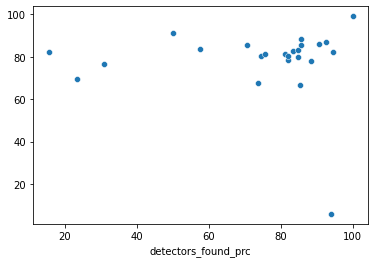

Test Correlation: (-0.05241704777601515, 0.8078128683091322)
Test R-squared: -0.6647961015510753

 Feature ranking:
1. did_not_work_past_12_mo (0.369370)
2. race_pct_black_or_amind (0.159623)
3. inc_pct_poverty (0.096801)
4. county_detectors_found_prc (0.096308)
5. house_yr_pct_before_1960 (0.089562)
6. pct_alt_heat (0.064655)
7. age_pct_over65 (0.053427)
8. house_val_less_50K (0.045263)
9. house_pct_live_alone (0.024991)
10. state_detectors_found_prc (0.000000)
11. Population Density (per square mile), 2010 (0.000000)


In [35]:
mdl5,X_test,y_test =train_model(X = rd, y = sm , ACS = ACS_justSmokeCols  ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
All-NaN slice encountered


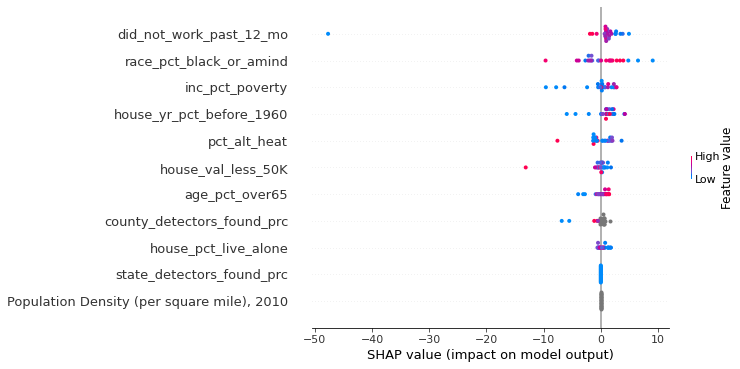

In [36]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl5).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

30536
116
928
116
-----Training_Performance------
5.449191761559841e-07
Test RMSE: 0.0007381864101675024
Test MAE: 0.0005276949509331499


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


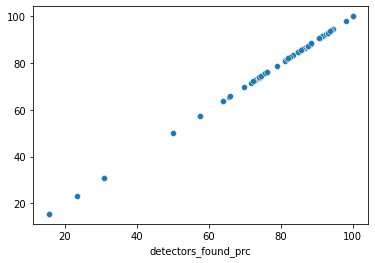

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


-----Test Performance ----- 
Test RMSE: 29.85479630642771
Test MAE: 19.18889663696289


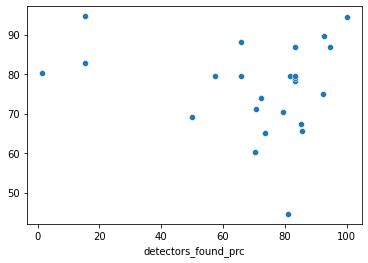

Test Correlation: (-0.14679716718204583, 0.4936672194915123)
Test R-squared: -0.3956921224447778

 Feature ranking:
1. inc_pct_poverty (0.246845)
2. pct_alt_heat (0.188450)
3. race_pct_black_or_amind (0.131699)
4. did_not_work_past_12_mo (0.121363)
5. house_pct_live_alone (0.115630)
6. age_pct_over65 (0.106870)
7. house_yr_pct_before_1960 (0.056413)
8. house_val_less_50K (0.032731)


In [37]:
mdl5_justACS,X_test,y_test = train_model_justACS(ACS = ACS_justSmokeCols, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


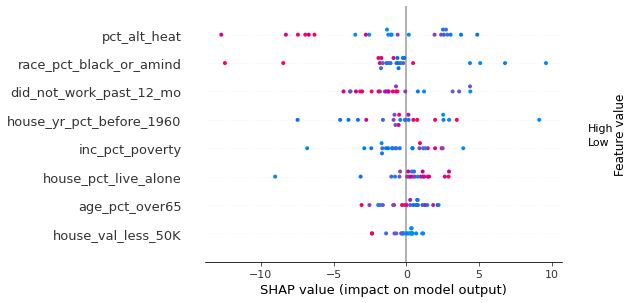

In [38]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl5_justACS).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

In [39]:
sm_all['rd_ACS_allCols'] =  mdl.predict(rd_all.merge(ACS,how = 'left', left_index = True, right_index = True) )
ACS_cols = ACS.columns
sm_all['ACS_allCols'] =  mdl_justACS.predict(rd_all.merge(ACS,how = 'left', left_index = True, right_index = True)[ACS_cols] )
sm_all['rd_ACS_reduced'] =  mdl2.predict(rd_all.merge(ACS_reduced,how = 'left', left_index = True, right_index = True) )

reduced_cols = ['heat_pct_coal','heat_pct_solar','house_yr_pct_before_1960','educ_less_12th','heat_pct_wood',
                  'inc_pct_poverty','age_pct_over65','race_pct_nonwhite','house_val_100K_300K','educ_no_school',
                  'house_pct_ownd_occupied','heat_pct_utility_gas','house_w_home_equity_loan','house_val_less_50K',
                  'educ_high_school','house_pct_family','heat_pct_other','house_pct_family_female_hh']
sm_all['ACS_reduced'] =  mdl2_justACS.predict(rd_all.merge(ACS_reduced,how = 'left', left_index = True, right_index = True)[reduced_cols] )
sm_all['No_ACS_Predictions'] =  mdl3.predict(rd_all )
sm_all['rd_ACS_commonCols'] =  mdl4.predict(rd_all.merge(ACS_commonCols,how = 'left', left_index = True, right_index = True) )
sm_all['ACS_commonCols'] =  mdl4_justACS.predict(rd_all.merge(ACS_commonCols,how = 'left', left_index = True, right_index = True)[ACS_cols_to_use] )
sm_all['rd_ACS_colsForSmoke'] =  mdl5.predict(rd_all.merge(ACS_justSmokeCols,how = 'left', left_index = True, right_index = True) )
sm_all['ACS_colsForSmoke'] =  mdl5_justACS.predict(rd_all.merge(ACS_justSmokeCols,how = 'left', left_index = True, right_index = True)[ACS_justSmoke_Cols] )

#sm_all['Avg_Predictions']  = (sm_all['No_ACS_Predictions'] +sm_all['ACS_commonCols_Predictions']) /2 

In [76]:
sm_all.loc[:,['num_surveys','geography',
              'detectors_found_prc',
              'detectors_working_prc',
              'rd_ACS_allCols','ACS_allCols','ACS_reduced','No_ACS_Predictions','rd_ACS_commonCols','ACS_commonCols','rd_ACS_colsForSmoke','ACS_colsForSmoke'    ] ]
sm_all = sm_all.merge(rd_all['Population Density (per square mile), 2010'],how = 'left',left_index = True,right_index = True)
sm_all.index =  '#_' + sm_all.index 

In [40]:
sm_all.to_csv(path / 'Data' / 'Model Outputs' / 'SmokeAlarmPredictiveModel_MD_ACS_WOULDNT_USE.csv')

In [78]:
sm_all.columns

Index(['num_surveys', 'detectors_found_total', 'detectors_found_prc',
       'detectors_found_CI', 'detectors_working_total',
       'detectors_working_prc', 'detectors_working_CI', 'geography', 'tract',
       'Full_Predictions', 'ACS_commonCols_Predictions', 'No_ACS_Predictions',
       'Avg_Predictions', 'Population Density (per square mile), 2010'],
      dtype='object')

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='No_ACS_Predictions'>

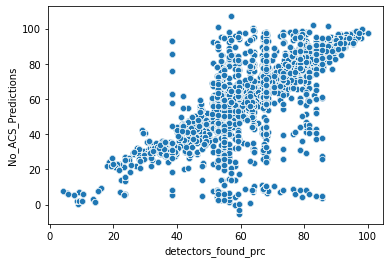

In [79]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['No_ACS_Predictions'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='ACS_commonCols_Predictions'>

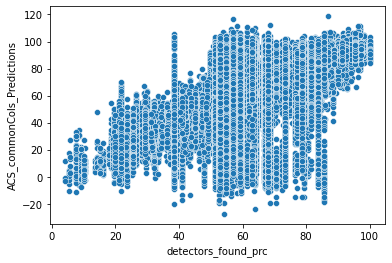

In [80]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['ACS_commonCols_Predictions'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Full_Predictions'>

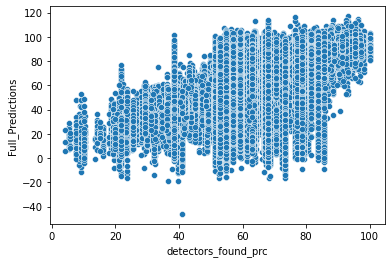

In [81]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['Full_Predictions'])


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Avg_Predictions'>

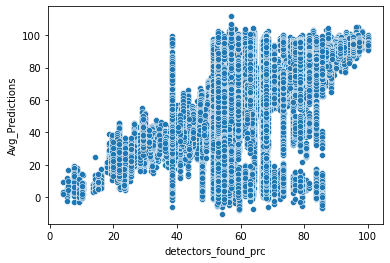

In [83]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['Avg_Predictions'])


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='No_ACS_Predictions'>

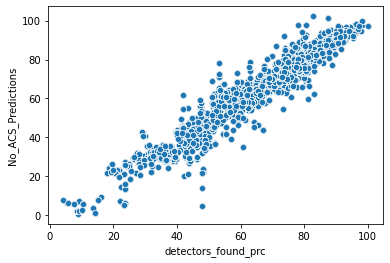

In [84]:
# plot of county predictions
sns.scatterplot(sm_all['detectors_found_prc'].where(sm_all['geography'] == 'county') ,sm_all['No_ACS_Predictions'].where(sm_all['geography'] == 'county' ) )


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Avg_Predictions'>

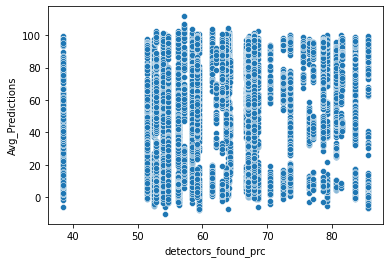

In [85]:
# plot of county predictions
sns.scatterplot(sm_all['detectors_found_prc'].where(sm_all['geography'] == 'state') ,sm_all['Avg_Predictions'].where(sm_all['geography'] == 'state' ) )